In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import numpy as np
import scipy as sp
import datetime as dt
import netCDF4 as nc
import pickle
import cmocean as cm
import glob
from salishsea_tools import grid_tools, viz_tools
from salishsea_tools import visualisations as vis

%matplotlib inline

# MB (Mass Balance): Visualizing differences in the mass balance of the 3 runs, by layer

In [6]:
#for all plots in nb, some plot specs

lw = 2
fs = 20
tcm = cm.cm.deep
fact = 0.7

In [7]:
#load DIC calculated mass balances, ie means and sums per layer per day 
car_suffix = '_dissolved_inorganic_carbon_means_perday_alg2.pkl'
car_suffix_sum = '_dissolved_inorganic_carbon_sums_perday_alg2.pkl'


BR2 = 'BR_2nd_2015'; LA3 = 'PI_3rd_2015'; PI3 = 'PI_ACBC_2015_3'
LA3rr = 'LA3'
PI3rr = 'PI3'

BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR2_var_sum = pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA3_var_sum = pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))

#depending if local or not
#mesh = nc.Dataset('/Users/terezajana/local_python/mesh_mask201702.nc')
#bath = nc.Dataset('/Users/terezajana/local_python/bathymetry_201702.nc')
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('//data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

csize = pickle.load(open('./pickles/cellsize_alg2.pkl', 'rb'))


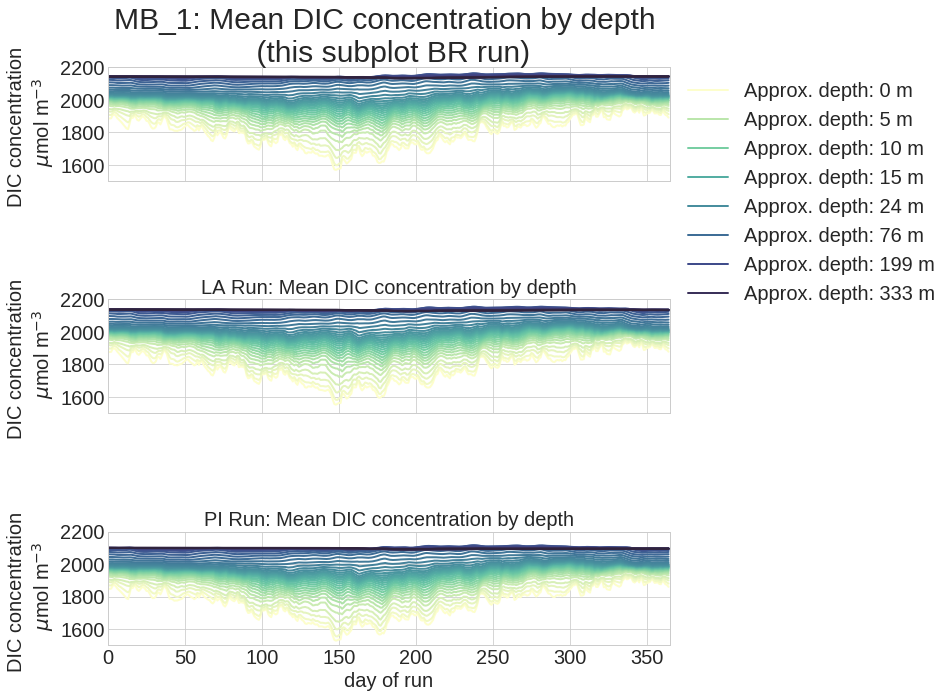

In [8]:
depth = mesh['gdept_1d'][:]
ymin = 1500
ymax = 2200

fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(3,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC concentration \n $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_1: Mean DIC concentration by depth \n (this subplot BR run)', fontsize = 30 )

#LA
ax = fig.add_subplot(3,1,2)

for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC concentration \n $\mu$mol m$^{-3}$', fontsize = fs)
plt.title('LA Run: Mean DIC concentration by depth', fontsize = fs )

#PI
ax = fig.add_subplot(3,1,3)

for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365])
plt.ylim([ymin,ymax])
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC concentration \n $\mu$mol m$^{-3}$', fontsize = fs)
plt.title('PI Run: Mean DIC concentration by depth', fontsize = fs )
plt.xlabel('day of run', fontsize = fs)
plt.tight_layout()


Text(0.5, 1.0, 'BR Run - PI Run : Mean DIC concentration difference, by depth')

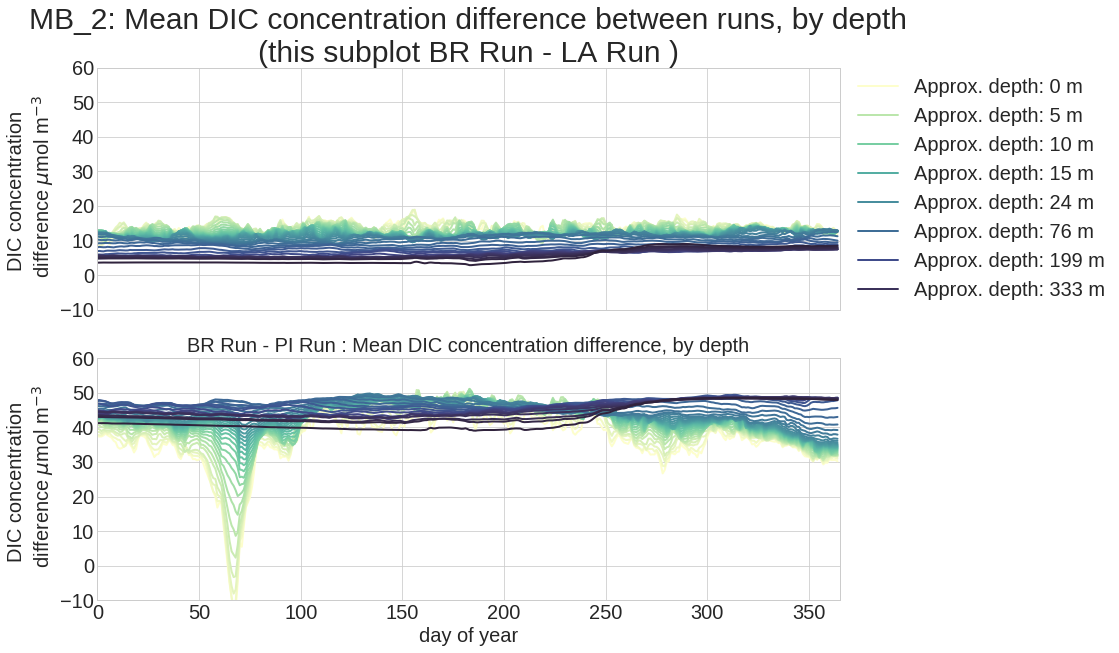

In [9]:
ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:]-LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:]-LA3_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_2: Mean DIC concentration difference between runs, by depth\
\n(this subplot BR Run - LA Run )', fontsize = 30 )

#LA
ax = fig.add_subplot(2,1,2)

for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,BR2_var[i,:]-PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365])
plt.ylim([ymin,ymax])
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
ax.set_xlabel('day of year', fontsize = fs)
ax.set_ylabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
plt.title('BR Run - PI Run : Mean DIC concentration difference, by depth', fontsize = fs )



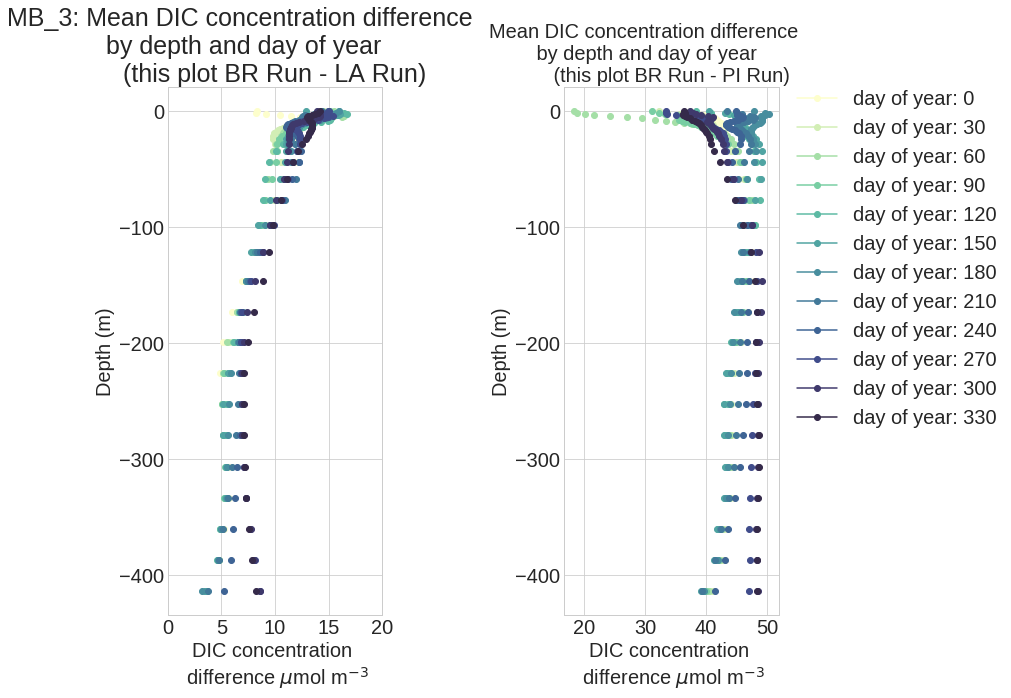

In [10]:
ymin = -10
ymax = 60


fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,2,1)

for d in range(0,12):
    for i in range(0,40):
        zdepth = (depth[0,i])  
        if i == 0:
            ax.plot((BR2_var[i,d*30]-LA3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax.plot((BR2_var[i,d*30]-LA3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlim([0,20])
ax.set_ylabel('Depth (m)', fontsize = fs)
ax.set_xlabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
#ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_3: Mean DIC concentration difference\
          \n by depth and day of year\
          \n (this plot BR Run - LA Run) ', fontsize = 25 )

plt.yticks(fontsize=fs)
#PI
ax = fig.add_subplot(1,2,2)

for d in range(0,12):
    for i in range(0,40):
        zdepth = (depth[0,i]) 
        if i == 0:
            ax.plot((BR2_var[i,d*30]-PI3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax.plot((BR2_var[i,d*30]-PI3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o')


plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_ylabel('Depth (m)', fontsize = fs)
ax.set_xlabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Mean DIC concentration difference\
          \n by depth and day of year\
          \n (this plot BR Run - PI Run) ', fontsize = fs )




plt.tight_layout()

Text(0, 0.5, 'depth (m)')

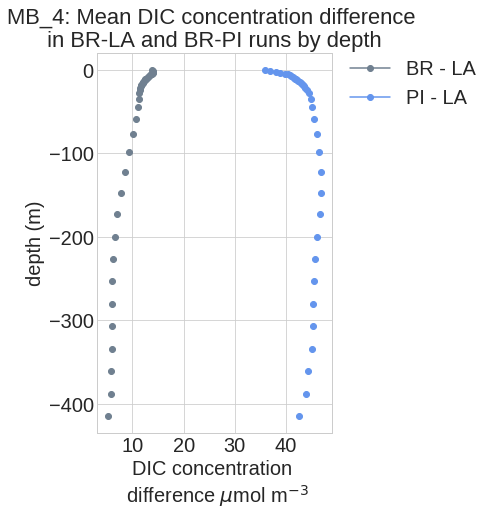

In [11]:
fig = plt.figure(figsize=(6*fact,10*fact))
days_in = np.arange(0,365,1)

ax = fig.add_subplot(1,1,1)


for i in range(0,40):
    zdepth = (depth[0,i])
    if i == 0:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'BR - LA')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])), -zdepth,\
                color = 'cornflowerblue', marker = 'o', label = 'PI - LA')
    else:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, color = 'slategrey', marker = 'o')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])),-zdepth,color = 'cornflowerblue', marker = 'o')

ax.set_xlabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_4: Mean DIC concentration difference \n in BR-LA and BR-PI runs \
by depth ', fontsize = fs+2 )
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_ylabel('depth (m)', fontsize = 20)

Text(0, 0.5, 'depth (m)')

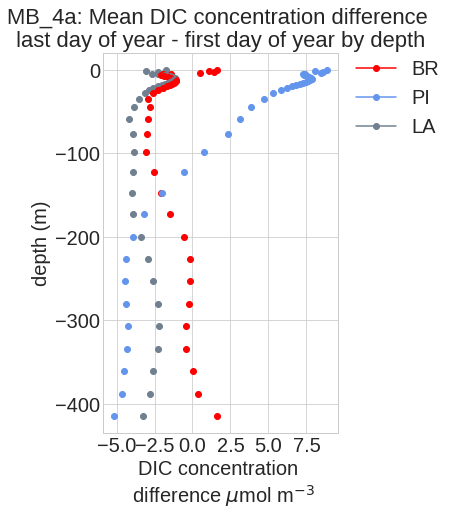

In [12]:
fig = plt.figure(figsize=(6*fact,10*fact))
days_in = np.arange(0,365,1)
de = 364
ds = 0
ax = fig.add_subplot(1,1,1)


for i in range(0,40):
    zdepth = (depth[0,i])  
    if i == 0:
        ax.plot((BR2_var[i,de]-BR2_var[i,ds]),-zdepth, \
                color = 'red', marker = 'o', label = 'BR')
        ax.plot((PI3_var[i,de]-PI3_var[i,ds]),-zdepth, \
                color = 'cornflowerblue', marker = 'o', label = 'PI')
        ax.plot((LA3_var[i,de]-LA3_var[i,ds]),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'LA')
    else:
        ax.plot((BR2_var[i,de]-BR2_var[i,ds]),-zdepth, \
                color = 'red', marker = 'o')
        ax.plot((PI3_var[i,de]-PI3_var[i,ds]),-zdepth, \
                color = 'cornflowerblue', marker = 'o')
        ax.plot((LA3_var[i,de]-LA3_var[i,ds]),-zdepth, \
                color = 'slategrey', marker = 'o')
        
ax.set_xlabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_4a: Mean DIC concentration difference \n last day of year - first day of year \
by depth ', fontsize = fs+2 )
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_ylabel('depth (m)', fontsize = 20)

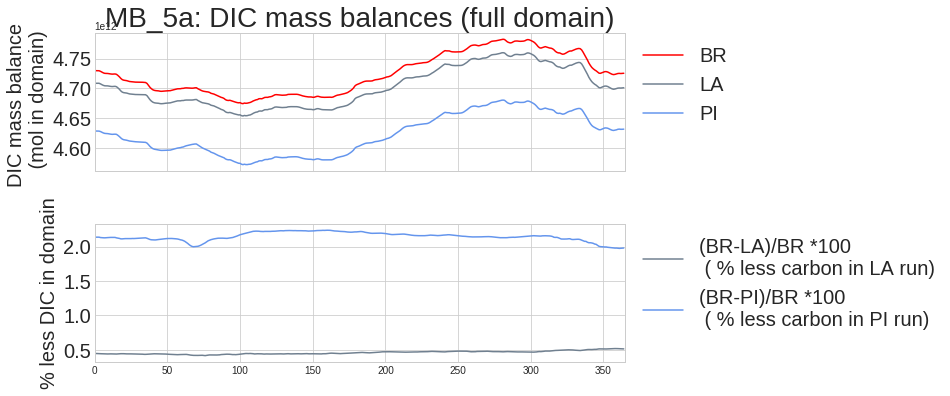

In [13]:
depth = mesh['gdept_1d'][:]
ymin = 1500
ymax = 2200

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

#sum domain totals, divide by 1000 to put it into mols
BR_tot = np.nansum(BR2_var_sum[:,:],axis = 0)*(1/1000)
LA_tot = np.nansum(LA3_var_sum[:,:],axis = 0)*(1/1000)
PI_tot = np.nansum(PI3_var_sum[:,:],axis = 0)*(1/1000)

ax.plot(days_in,BR_tot,color = 'red', label = 'BR')
ax.plot(days_in,LA_tot,color = 'slategrey', label = 'LA')
ax.plot(days_in,PI_tot,color = 'cornflowerblue', label = 'PI')
plt.xlim([0,365])
#plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC mass balance \n (mol in domain)', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_5a: DIC mass balances (full domain)', fontsize = 28 )


ax = fig.add_subplot(2,1,2)

ax.plot(days_in, ((BR_tot-LA_tot)/BR_tot)*100,color = 'slategrey', \
        label = '(BR-LA)/BR *100 \n ( % less carbon in LA run)')
ax.plot(days_in, ((BR_tot-PI_tot)/BR_tot)*100,color = 'cornflowerblue', \
        label = '(BR-PI)/BR *100 \n ( % less carbon in PI run)')

plt.xlim([0,365])

#plt.ylim([ymin,ymax])
#ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('% less DIC in domain', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


plt.tight_layout()


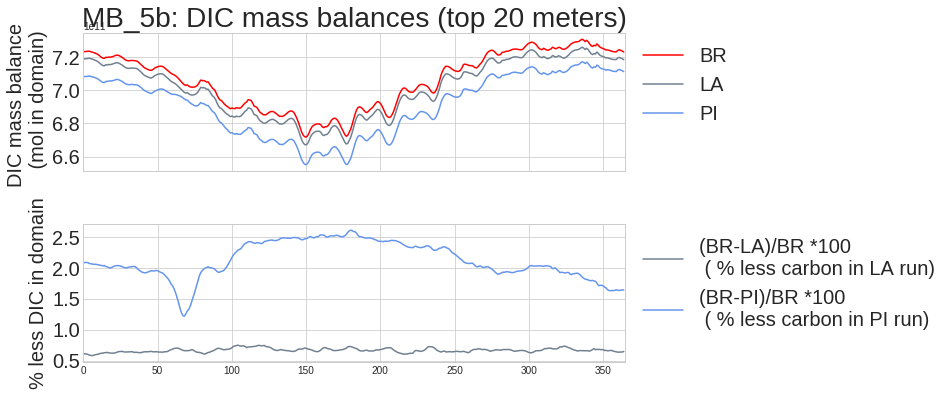

In [14]:
depth = mesh['gdept_1d'][:]
ymin = 1500
ymax = 2200

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

#sum domain totals, divide by 1000 to put it into mols
BR_tot = np.nansum(BR2_var_sum[0:20,:],axis = 0)*(1/1000)
LA_tot = np.nansum(LA3_var_sum[0:20,:],axis = 0)*(1/1000)
PI_tot = np.nansum(PI3_var_sum[0:20,:],axis = 0)*(1/1000)

ax.plot(days_in,BR_tot,color = 'red', label = 'BR')
ax.plot(days_in,LA_tot,color = 'slategrey', label = 'LA')
ax.plot(days_in,PI_tot,color = 'cornflowerblue', label = 'PI')
plt.xlim([0,365])
#plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC mass balance \n (mol in domain)', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_5b: DIC mass balances (top 20 meters)', fontsize = 28 )


ax = fig.add_subplot(2,1,2)

ax.plot(days_in, ((BR_tot-LA_tot)/BR_tot)*100,color = 'slategrey', \
        label = '(BR-LA)/BR *100 \n ( % less carbon in LA run)')
ax.plot(days_in, ((BR_tot-PI_tot)/BR_tot)*100,color = 'cornflowerblue', \
        label = '(BR-PI)/BR *100 \n ( % less carbon in PI run)')

plt.xlim([0,365])

#plt.ylim([ymin,ymax])
#ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('% less DIC in domain', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


plt.tight_layout()


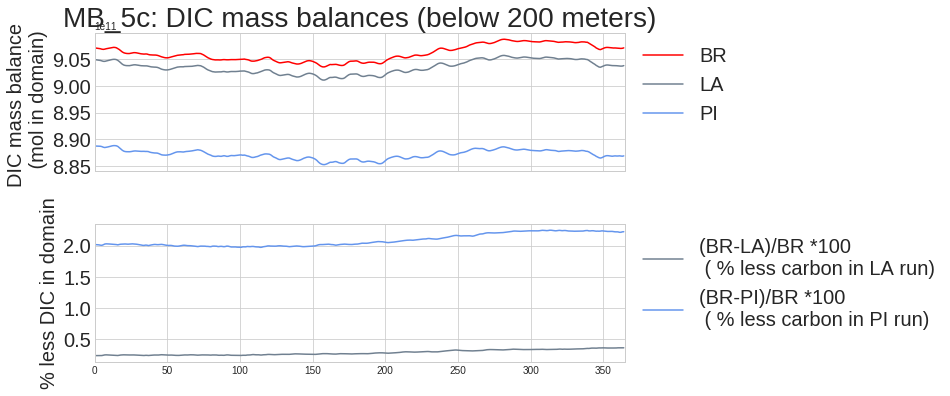

In [15]:
depth = mesh['gdept_1d'][:]
ymin = 1500
ymax = 2200

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

#sum domain totals, divide by 1000 to put it into mols
BR_tot = np.nansum(BR2_var_sum[30:39,:],axis = 0)*(1/1000)
LA_tot = np.nansum(LA3_var_sum[30:39,:],axis = 0)*(1/1000)
PI_tot = np.nansum(PI3_var_sum[30:39,:],axis = 0)*(1/1000)

ax.plot(days_in,BR_tot,color = 'red', label = 'BR')
ax.plot(days_in,LA_tot,color = 'slategrey', label = 'LA')
ax.plot(days_in,PI_tot,color = 'cornflowerblue', label = 'PI')
plt.xlim([0,365])
#plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC mass balance \n (mol in domain)', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_5c: DIC mass balances (below 200 meters)', fontsize = 28 )


ax = fig.add_subplot(2,1,2)

ax.plot(days_in, ((BR_tot-LA_tot)/BR_tot)*100,color = 'slategrey', \
        label = '(BR-LA)/BR *100 \n ( % less carbon in LA run)')
ax.plot(days_in, ((BR_tot-PI_tot)/BR_tot)*100,color = 'cornflowerblue', \
        label = '(BR-PI)/BR *100 \n ( % less carbon in PI run)')

plt.xlim([0,365])

#plt.ylim([ymin,ymax])
#ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('% less DIC in domain', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


plt.tight_layout()


# JDF (JDF lateral flux) - convention - positive is into domain

In [16]:
car_suffix = '_DIC_UT_JDFfluxmean_perday_alg2.pkl'
car_suffix_sum = '_DIC_UT_JDFfluxsum_perday_alg2.pkl'
BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR2_var_sum = pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA3_var_sum = pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))



(array([-60000., -40000., -20000.,      0.,  20000.,  40000.,  60000.]),
 <a list of 7 Text yticklabel objects>)

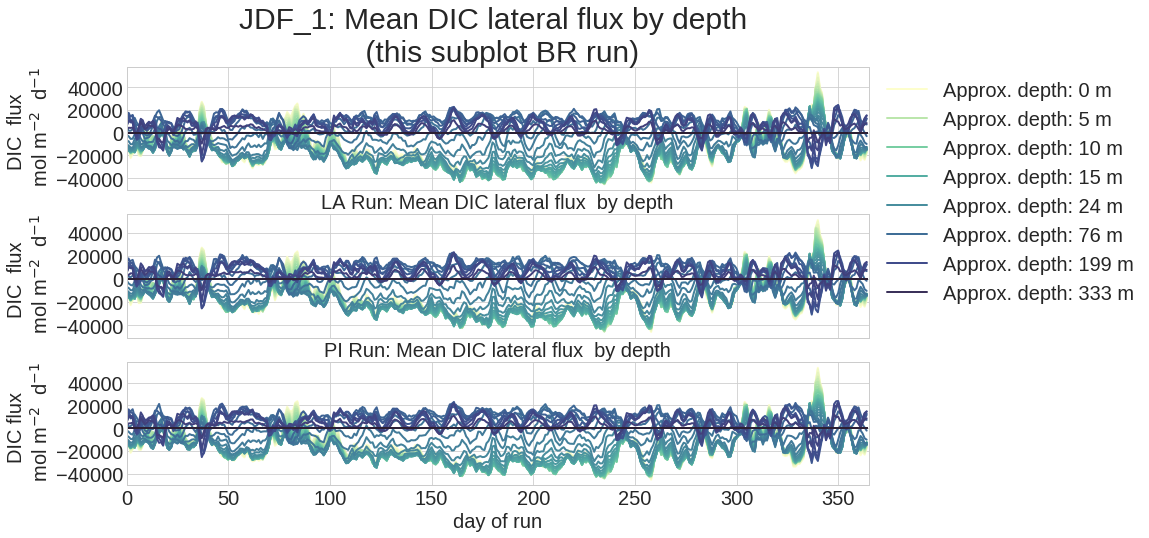

In [17]:
depth = mesh['gdept_1d'][:]
fig = plt.figure(figsize=(19*fact,11*fact))
days_in = np.arange(0,365,1)
fs = 20

#BR
ax = fig.add_subplot(3,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('DIC  flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('JDF_1: Mean DIC lateral flux by depth \n (this subplot BR run)', fontsize = 30 )
plt.yticks(fontsize = fs)

#LA
ax = fig.add_subplot(3,1,2)
for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('DIC  flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
plt.title('LA Run: Mean DIC lateral flux  by depth', fontsize = fs )
plt.yticks(fontsize = fs)

#PI
ax = fig.add_subplot(3,1,3)
for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
plt.xlim([0,365])
ax.set_ylabel('DIC flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
plt.title('PI Run: Mean DIC lateral flux  by depth', fontsize = fs )
plt.xlabel('day of run', fontsize = fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
#plt.tight_layout()


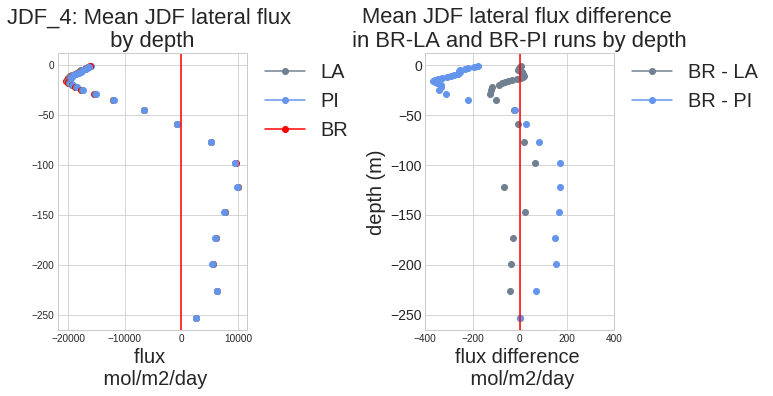

In [18]:




#####
ymin = -10
ymax = 60

fig = plt.figure(figsize=(15*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,2,1)
for i in range(0,33):
    zdepth = (depth[0,i])  
    if i == 0:
        ax.plot(np.mean((LA3_var[i,:])),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'LA')
        ax.plot(np.mean((PI3_var[i,:])), -zdepth, \
                color = 'cornflowerblue', marker = 'o', label = 'PI')
        ax.plot(np.mean((BR2_var[i,:])), -zdepth, \
                color = 'red', marker = 'o', label = 'BR')
    else:
        ax.plot(np.mean((BR2_var[i,:])),-zdepth, color = 'red', marker = 'o')
        ax.plot(np.mean((LA3_var[i,:])),-zdepth, color = 'slategrey', marker = 'o')
        ax.plot(np.mean((PI3_var[i,:])),-zdepth, color = 'cornflowerblue', marker = 'o')
        
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.axvline(x=0,color = 'r')
plt.title('JDF_4: Mean JDF lateral flux \n \
by depth ', fontsize = fs+2 )
ax.set_xlabel('flux \n mol/m2/day', fontsize = fs)

ax = fig.add_subplot(1,2,2)



for i in range(0,33):
    zdepth = (depth[0,i])  
    if i == 0:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'BR - LA')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])), -zdepth, \
                color = 'cornflowerblue', marker = 'o', label = 'BR - PI')
    else:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, color = 'slategrey', marker = 'o')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])),-zdepth, color = 'cornflowerblue', marker = 'o')

ax.set_xlabel('flux difference \n mol/m2/day', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Mean JDF lateral flux difference \n in BR-LA and BR-PI runs \
by depth ', fontsize = fs+2 )
#plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel('depth (m)', fontsize = 20)
plt.xlim(-400,400)
plt.axvline(x=0,color = 'r')
plt.tight_layout()




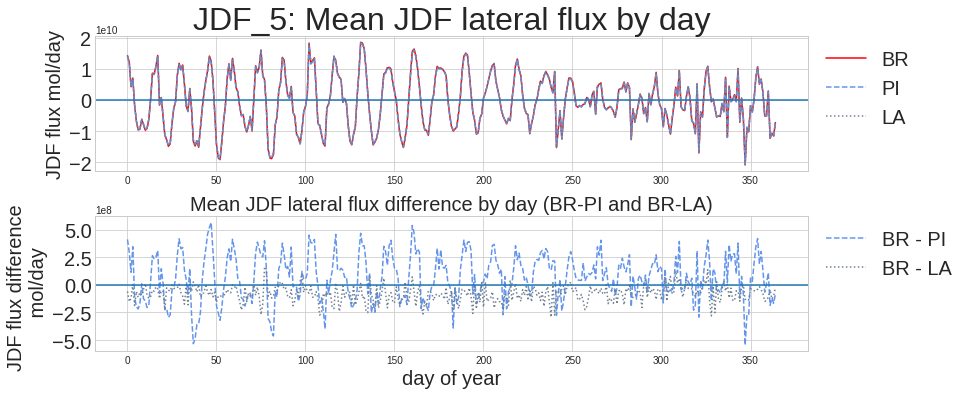

In [19]:
#####plot
#####
#####
BR2_fullcol_sum = np.sum(BR2_var_sum, axis = 0)
PI3_fullcol_sum = np.sum(PI3_var_sum, axis = 0)
LA3_fullcol_sum = np.sum(LA3_var_sum, axis = 0)

ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

ax.plot(BR2_fullcol_sum, color = 'red', label = 'BR')
ax.plot(PI3_fullcol_sum, color = 'cornflowerblue', linestyle = '--', label = 'PI')
ax.plot(LA3_fullcol_sum, color = 'slategrey', linestyle = ':', label = 'LA')
plt.title('JDF_5: Mean JDF lateral flux by day', fontsize = 32 )
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
ax.set_ylabel('JDF flux mol/day', fontsize = fs)
plt.axhline(y=0)
plt.yticks(fontsize=fs)

plt.tight_layout()
ax = fig.add_subplot(2,1,2)

ax.plot(BR2_fullcol_sum-PI3_fullcol_sum, color = 'cornflowerblue', linestyle = '--', label = 'BR - PI')
ax.plot(BR2_fullcol_sum-LA3_fullcol_sum, color = 'slategrey', linestyle = ':', label = 'BR - LA')

ax.set_ylabel('var concentration difference', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Mean JDF lateral flux difference by day (BR-PI and BR-LA)', fontsize = 20 )
plt.yticks(fontsize=fs)
ax.set_xlabel('day of year', fontsize = 20)
ax.set_ylabel('JDF flux difference \n mol/day', fontsize = fs)
plt.tight_layout()
plt.axhline(y=0)

BR_JDF_yr_flx = np.sum(BR2_fullcol_sum)
PI_JDF_yr_flx = np.sum(PI3_fullcol_sum)
LA_JDF_yr_flx = np.sum(LA3_fullcol_sum)

Text(0.5, 0.98, 'MASK of regions, input file')

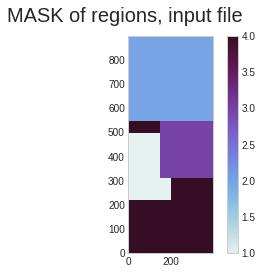

In [20]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('MASK of regions, input file',fontsize=20)


In [21]:
OmA_deepAlg = { 'LA': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'},
                'BR': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'},
                'PI': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'}}

#LA
Oma_hor_deep_LA = nc.Dataset('../KEY_OMA/OMA_current_NCS/LA_OmA_horizon_DEEPALG.nc')
OmArHORIZON_la_deepalg =  Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_la_deepalg =  np.concatenate([OmA_h_janfeb_la_deepalg,OmA_h_dec_la_deepalg])
OmA_h_summer_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_summer_mean_la_deepalg =  np.nanmean(OmA_h_summer_la_deepalg,axis = 0)
OmA_h_winter_mean_la_deepalg =  np.nanmean(OmA_h_winter_la_deepalg,axis = 0)

#BR
Oma_hor_deep_BR = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA_horizon_DEEPALG.nc')
OmArHORIZON_br_deepalg =  Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_br_deepalg =  np.concatenate([OmA_h_janfeb_br_deepalg,OmA_h_dec_br_deepalg])
OmA_h_summer_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_winter_mean_br_deepalg =  np.nanmean(OmA_h_winter_br_deepalg,axis = 0)
OmA_h_summer_mean_br_deepalg =  np.nanmean(OmA_h_summer_br_deepalg,axis = 0)

##PI
Oma_hor_deep_PI = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI_OmA_horizon_DEEPALG.nc')
OmArHORIZON_PI_deepalg =  Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_PI_deepalg =  np.concatenate([OmA_h_janfeb_PI_deepalg,OmA_h_dec_PI_deepalg])
OmA_h_summer_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_summer_mean_PI_deepalg =  np.nanmean(OmA_h_summer_PI_deepalg,axis = 0)
OmA_h_winter_mean_PI_deepalg =  np.nanmean(OmA_h_winter_PI_deepalg,axis = 0)



/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice


In [22]:


#

OmA_deepAlg_summer = { 'la': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                      'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}
OmA_deepAlg_winter = { 'la': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                      'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}


reg = ['JdF','N. Sog','S. Sog','Haro']
for i in range(1,5):
    
    surf_mask = mask[0,:,:]
    
    reg_mask = np.where(surf_mask == i)
    #print('')
    #print(reg[i-1])
    
    summer_shoal = (OmA_h_summer_mean_la_deepalg - OmA_h_summer_mean_br_deepalg)
    #print('average summer sat. hor. (la): ', np.nanmean(OmA_h_summer_mean_la_deepalg[reg_mask]))
    OmA_deepAlg_summer['la'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_la_deepalg[reg_mask])
    #print('average summer sat. hor (BR): ', np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_summer['BR'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask])
    #print('la-BR shoaling summer: ', np.nanmean(summer_shoal[reg_mask]))
    
    winter_shoal = (OmA_h_winter_mean_la_deepalg - OmA_h_winter_mean_br_deepalg)
    #print('average winter sat. hor. (la): ', np.nanmean(OmA_h_winter_mean_la_deepalg[reg_mask]))
    OmA_deepAlg_winter['la'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_la_deepalg[reg_mask])
    #print('average winter sat. hor (BR): ', np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_winter['BR'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask])
    #print('la-BR shoaling winter: ', np.nanmean(winter_shoal[reg_mask]))
    

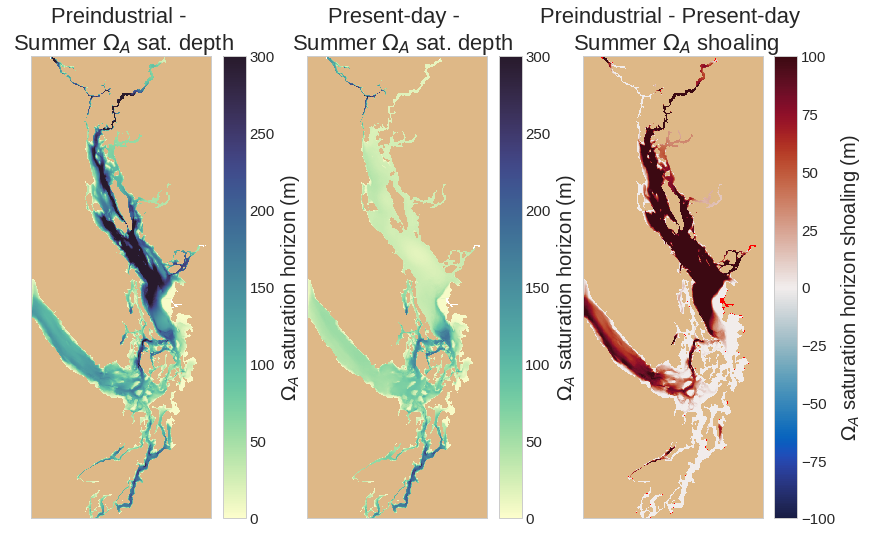

In [23]:
#PI_BR_summer_shoaling = (OmA_h_summer_mean_PI_deepalg-OmA_h_summer_mean_br_deepalg)

fig = plt.figure(figsize=(14*1,8.5*1))

ax1 = fig.add_subplot(1,3,1)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_PI_deepalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=300)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)

ax1.set_title('Preindustrial - \n Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(1,3,2)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=300)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - \n  Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax3 = fig.add_subplot(1,3,3)
cmap = cm.cm.balance
tplt = OmA_h_summer_mean_PI_deepalg - OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax3.set_title('Preindustrial - Present-day \n Summer $\Omega_A$ shoaling', fontsize = 22)
cbar = plt.colorbar(mesh)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)

cmap.set_bad('red')
cmap.set_bad('red')


In [24]:
reg_mask = np.where((surf_mask == 1) | (surf_mask == 2) | (surf_mask == 3))

OmA_h_summer_mean_PI_noharo = OmA_h_summer_mean_PI_deepalg[reg_mask]
OmA_h_summer_mean_br_noharo = OmA_h_summer_mean_br_deepalg[reg_mask]

PI_BR_summer_shoaling = (OmA_h_summer_mean_PI_deepalg-OmA_h_summer_mean_br_deepalg)
print('mean, std of domain shoaling- summer')
print(np.nanmean(PI_BR_summer_shoaling))
print(np.nanstd(PI_BR_summer_shoaling))

print('mean, std of domain shoaling when taking out haro -summer ')

PI_BR_summer_shoal_noharo = (OmA_h_summer_mean_PI_noharo-OmA_h_summer_mean_br_noharo)
print(np.nanmean(PI_BR_summer_shoal_noharo))
print(np.nanstd(PI_BR_summer_shoal_noharo))

reg_mask = np.where((surf_mask == 1) | (surf_mask == 2) | (surf_mask == 3))

OmA_h_winter_mean_PI_noharo = OmA_h_winter_mean_PI_deepalg[reg_mask]
OmA_h_winter_mean_br_noharo = OmA_h_winter_mean_br_deepalg[reg_mask]

PI_BR_winter_shoaling = (OmA_h_winter_mean_PI_deepalg-OmA_h_winter_mean_br_deepalg)
print('mean, std of domain shoaling- winter')
print(np.nanmean(PI_BR_winter_shoaling))
print(np.nanstd(PI_BR_winter_shoaling))

print('mean, std of domain shoaling when taking out haro -winter ')

PI_BR_winter_shoal_noharo = (OmA_h_winter_mean_PI_noharo-OmA_h_winter_mean_br_noharo)
print(np.nanmean(PI_BR_winter_shoal_noharo))
print(np.nanstd(PI_BR_winter_shoal_noharo))

mean, std of domain shoaling- summer
67.47732
94.48349
mean, std of domain shoaling when taking out haro -summer 
87.327995
101.0825
mean, std of domain shoaling- winter
70.04699
98.98334
mean, std of domain shoaling when taking out haro -winter 
93.44134
105.26029


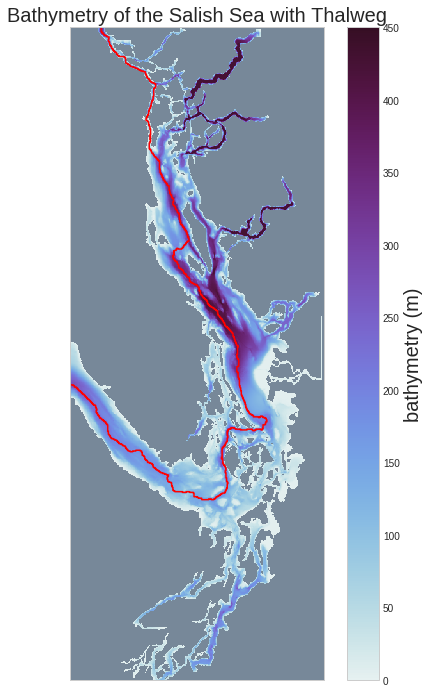

In [33]:
## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    #ax.set_xlabel('x Index', fontsize = 20 )
    #ax.set_ylabel('y Index', fontsize = 20 )
    plt.xticks([])
    plt.yticks([])
    plt.xlim([0,398])
    plt.ylim([0,898])

    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel, fontsize = 20)
    
    #plot thalweg?
    lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
    lines = lines.astype(int)

    ax.plot(lines[:,1], lines[:,0], 'r')
fact = 0.4
plot_bathy(bath1,'Bathymetry of the Salish Sea with Thalweg', \
               cm.cm.dense,20*fact,30*fact,0,450,'bathymetry (m)','')

In [26]:
#pickle.dump(BR_summer, open("BR_summer_OmA_mean.pkl", 'wb'))
#pickle.dump(PI_summer, open("PI_summer_OmA_mean.pkl", 'wb'))
f = open('../KEY_OMA/BR_summer_OmA_mean.pkl', 'rb')
BR_summer_OmA_mean = pickle.load(f) 
f = open('../KEY_OMA/PI_summer_OmA_mean.pkl', 'rb')
PI_summer_OmA_mean = pickle.load(f) 

Text(0.5, 0, '')

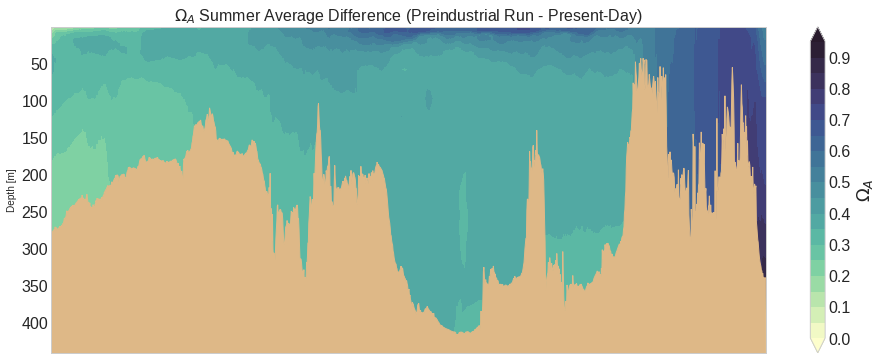

In [29]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

fig, (ax1) = plt.subplots(1,1,figsize=(16,6))
cbar = vis.contour_thalweg(ax1, PI_summer_OmA_mean-BR_summer_OmA_mean, bathy, mesh, np.arange(0.0, 1.0, 0.05), cmap = cm.cm.deep)
ax1.set_title('$\Omega_A$ Summer Average Difference (Preindustrial Run - Present-Day)', fontsize = 16)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('$\Omega_A$', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_xticklabels([])
ax1.set_xlabel('')



Text(0.5, 0, '')

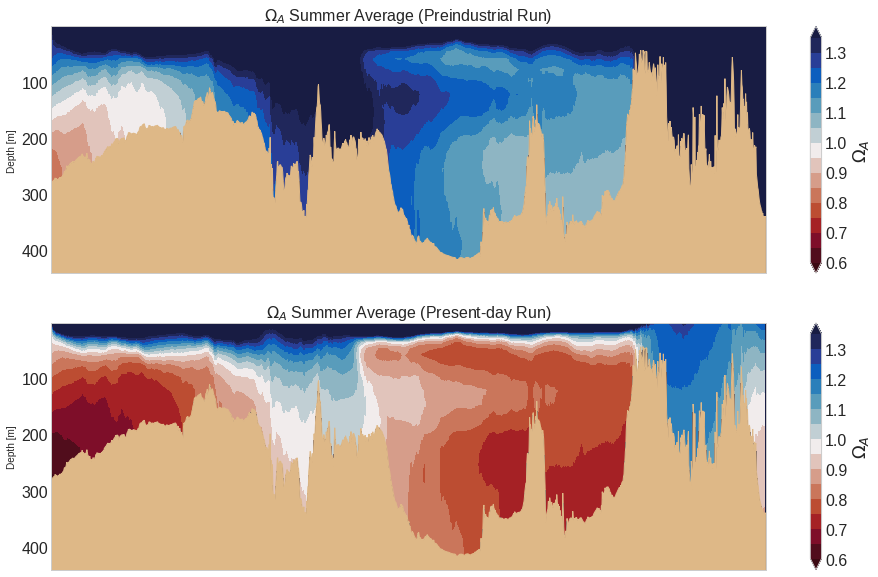

In [28]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,10))
cbar = vis.contour_thalweg(ax1, PI_summer_OmA_mean, bathy, mesh, np.arange(0.6, 1.4, 0.05), cmap = cm.cm.balance_r)
ax1.set_title('$\Omega_A$ Summer Average (Preindustrial Run)', fontsize = 16)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('$\Omega_A$', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_xticklabels([])
ax1.set_xlabel('')

cbar = vis.contour_thalweg(ax2, BR_summer_OmA_mean, bathy, mesh, np.arange(0.6, 1.4, 0.05), cmap = cm.cm.balance_r)
ax2.set_title('$\Omega_A$ Summer Average (Present-day Run)', fontsize = 16)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('$\Omega_A$', fontsize = 18)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_xticklabels([])
ax2.set_xlabel('')